# Módulo 10 tarefa 3

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [ ]:
**Grafico de barras para avaliar a distribuição de variaveis qualitativas no tempo

In [8]:
import pandas as pd

# Carregando o arquivo CSV em um DataFrame
df = pd.read_csv('previsao_de_renda.csv')

# Exibindo as primeiras linhas do DataFrame para verificação
print(previsao_de_renda.head())

   Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    mau    renda  
0     36 

<Figure size 1400x800 with 0 Axes>

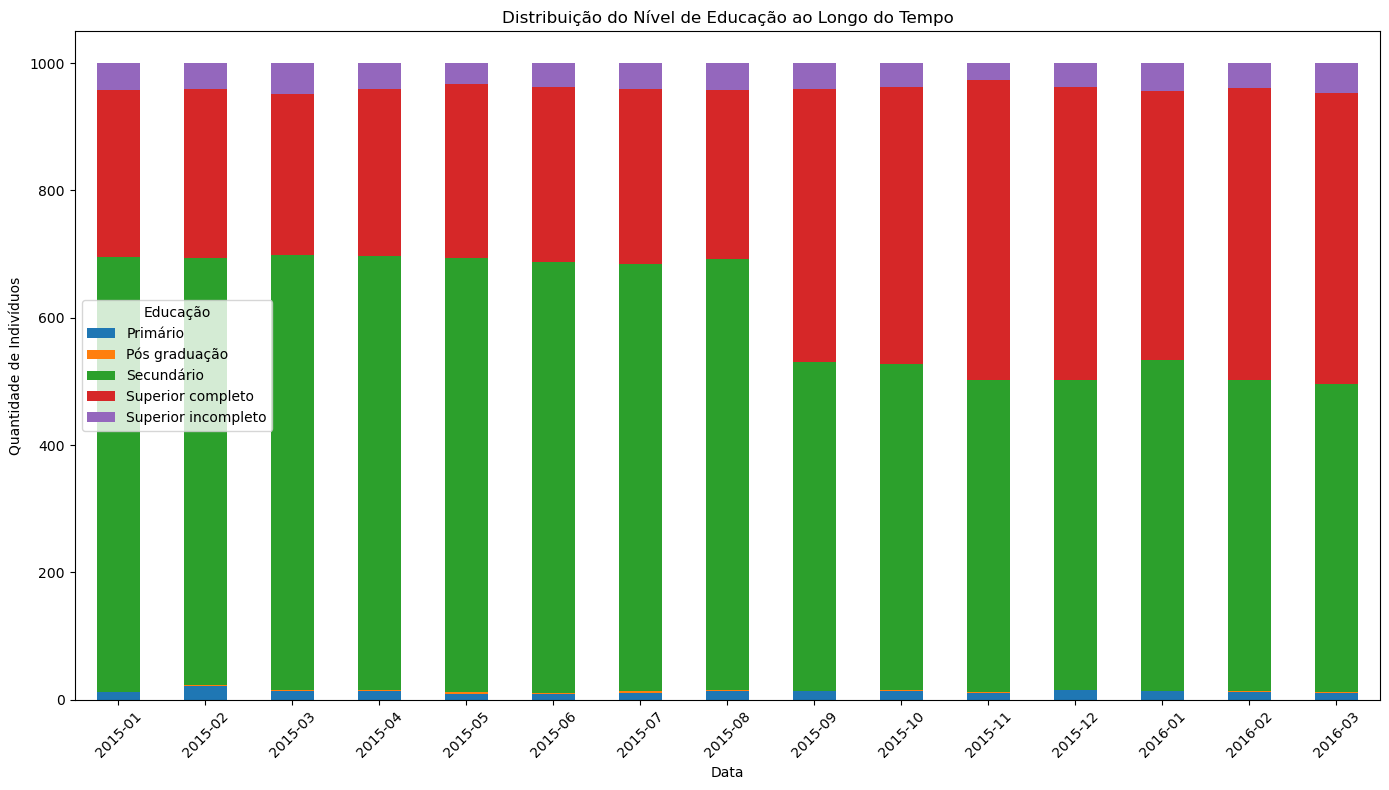

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertendo 'data_ref' para datetime para facilitar a manipulação
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Agrupando os dados por data e educação e contando o número de ocorrências
dados_agrupados = df.groupby([df['data_ref'].dt.to_period('M'), 'educacao']).size().unstack(fill_value=0)

# Plotando o gráfico de barras
plt.figure(figsize=(14, 8))
dados_agrupados.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Distribuição do Nível de Educação ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade de Indivíduos')
plt.xticks(rotation=45)
plt.legend(title='Educação')
plt.tight_layout()

# Mostrando o gráfico
plt.show()


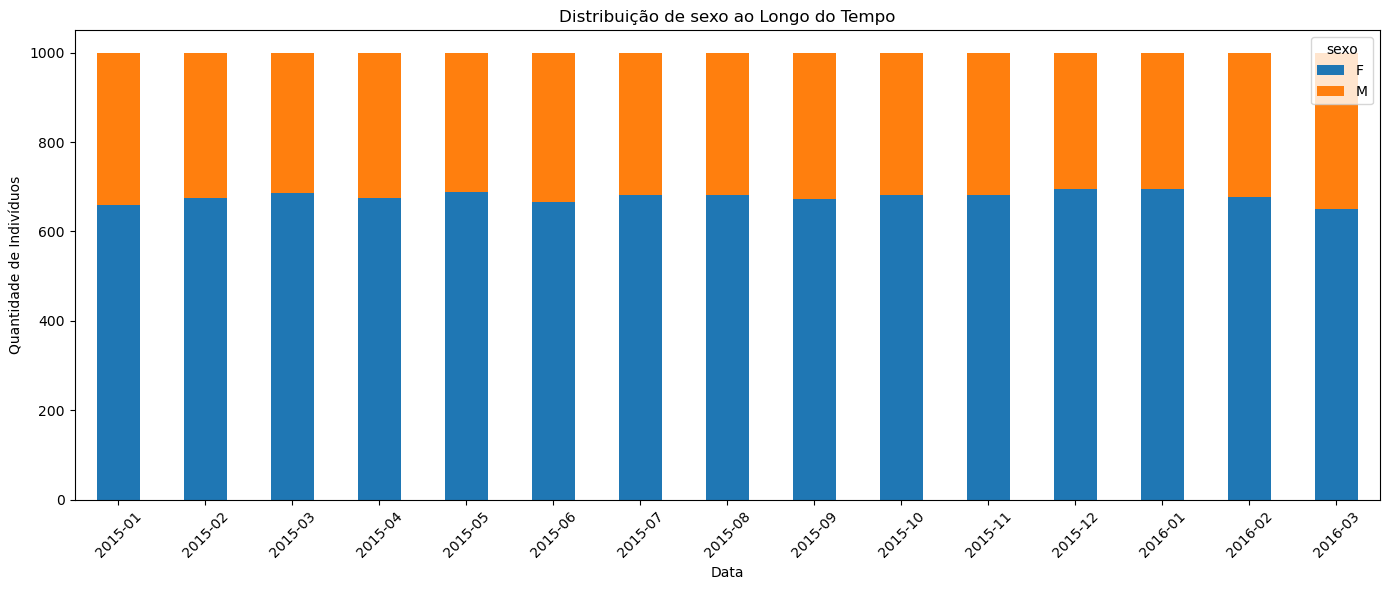

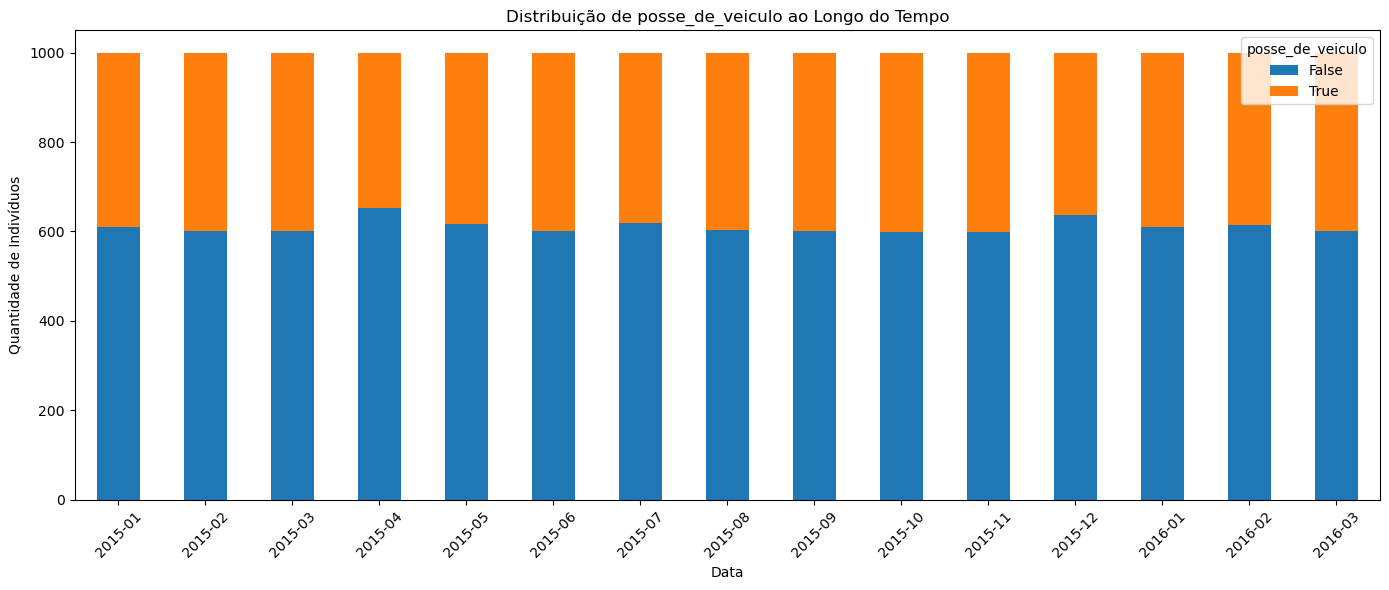

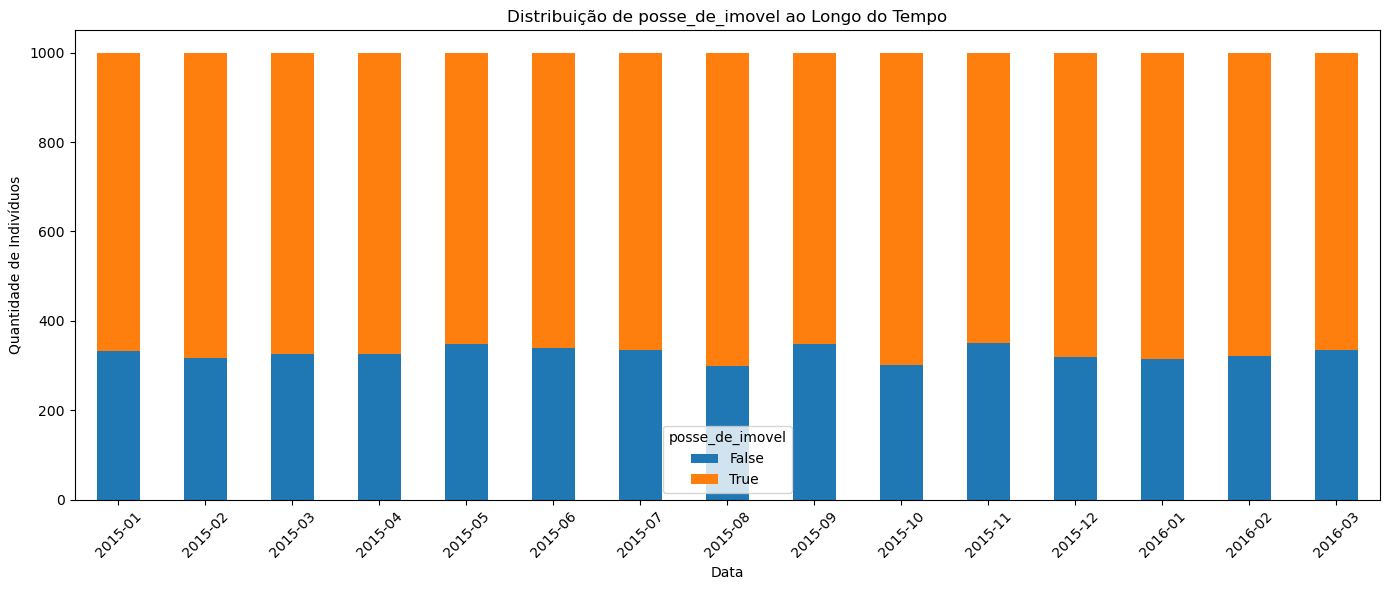

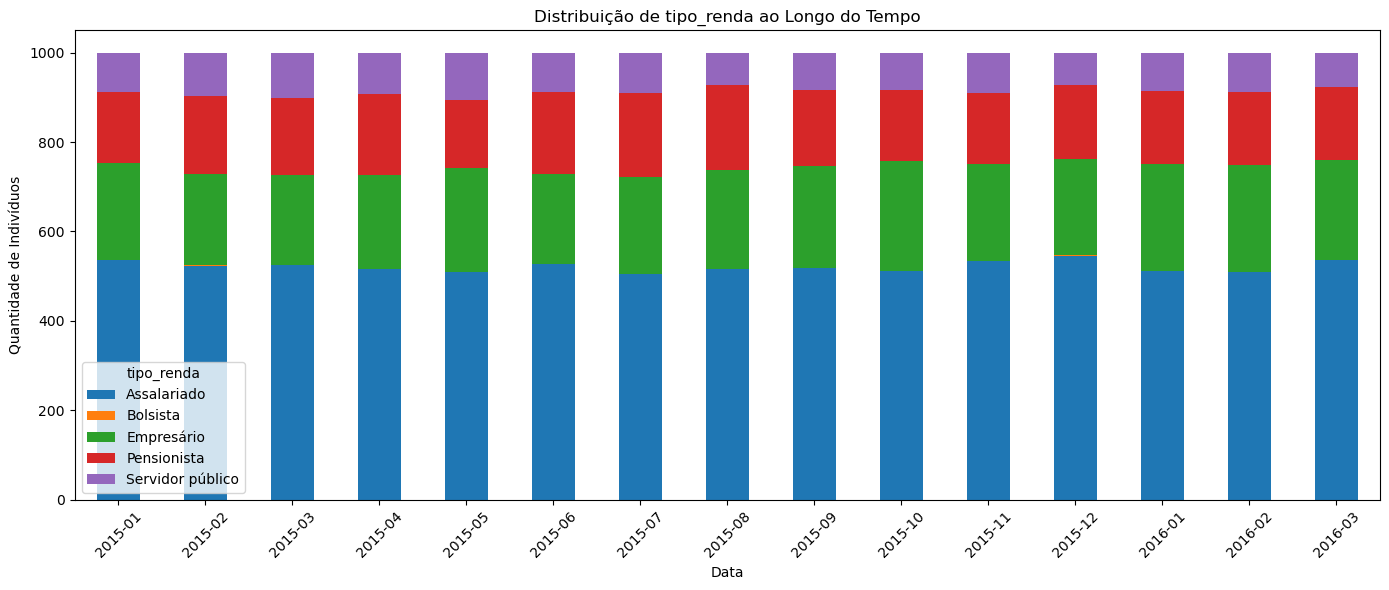

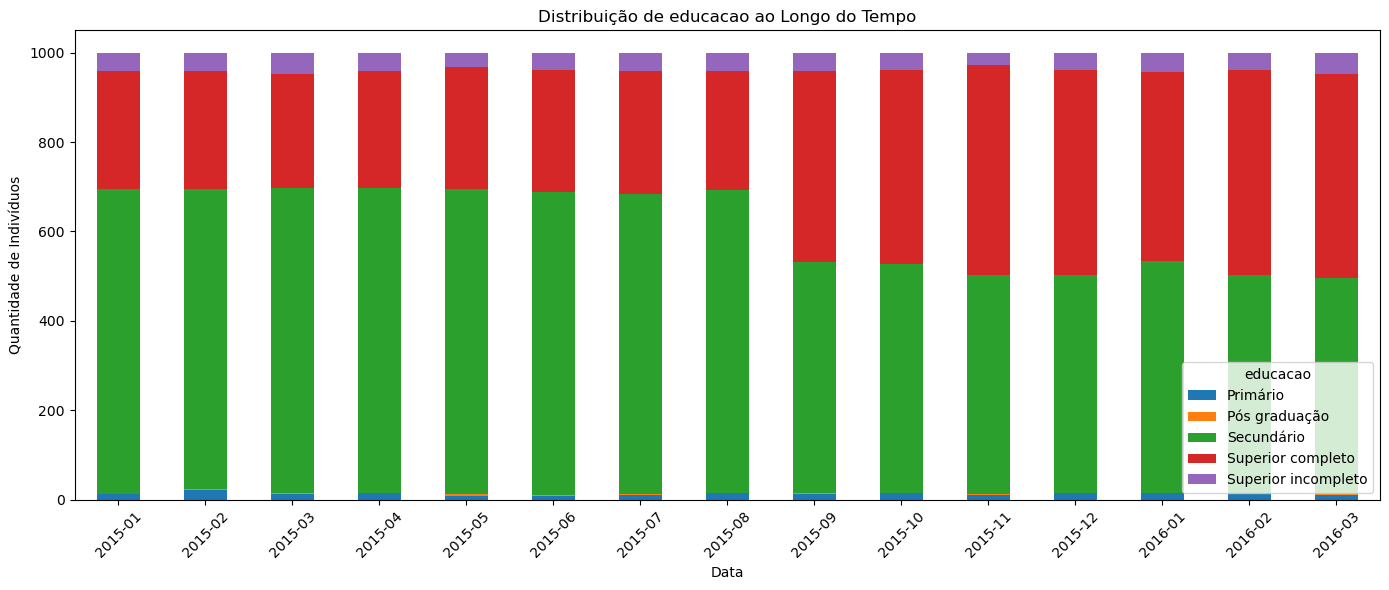

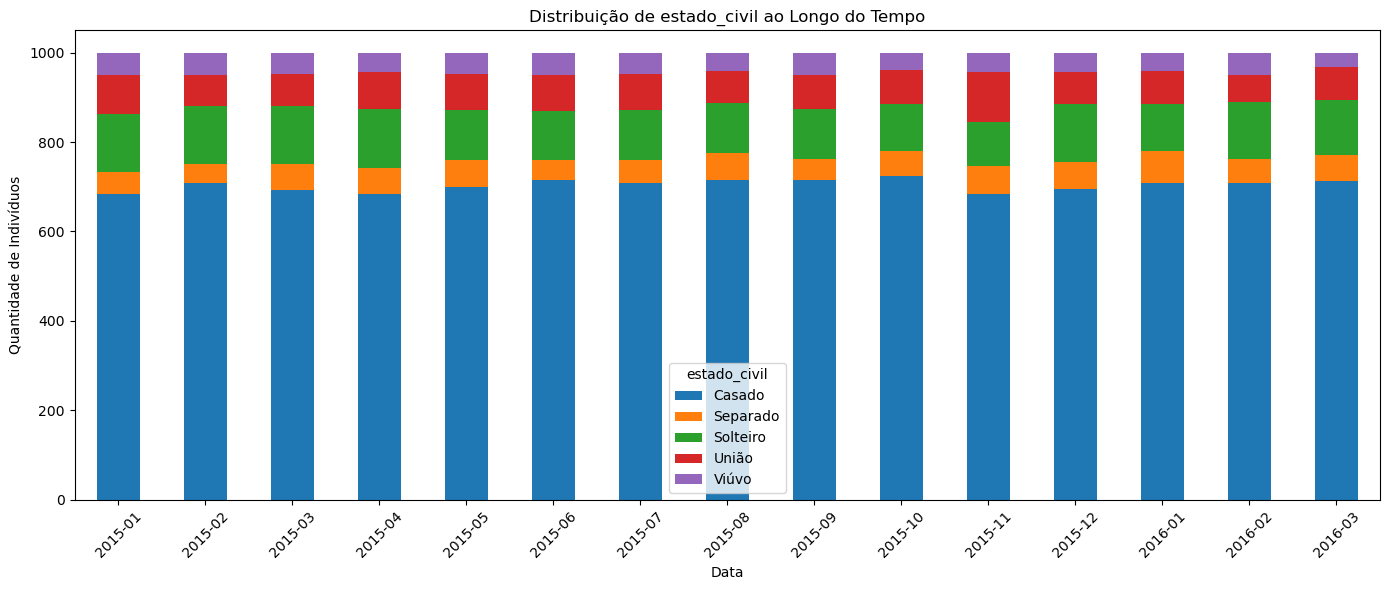

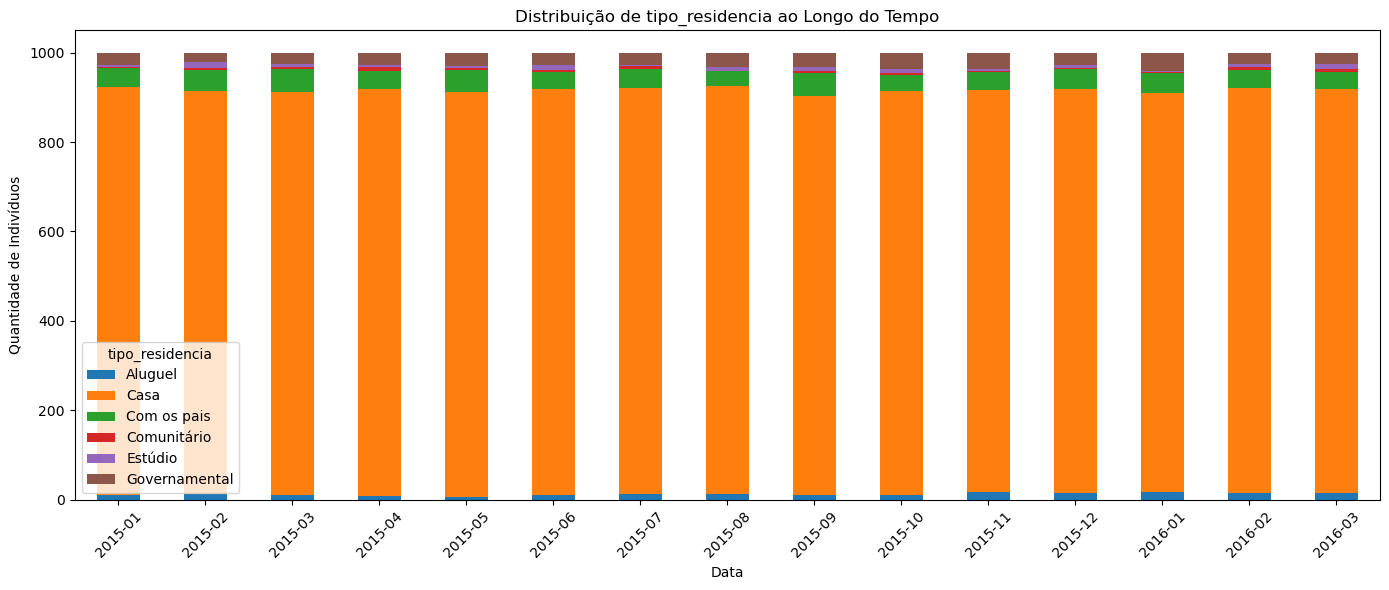

In [17]:
# Definindo uma função para plotar os gráficos de distribuição das variáveis qualitativas ao longo do tempo
def plot_distribuicao_temporal(data, variavel_qualitativa, titulo):
    dados_agrupados = data.groupby([data['data_ref'].dt.to_period('M'), variavel_qualitativa]).size().unstack(fill_value=0)
    dados_agrupados.plot(kind='bar', stacked=True, figsize=(14, 6))
    plt.title(titulo)
    plt.xlabel('Data')
    plt.ylabel('Quantidade de Indivíduos')
    plt.xticks(rotation=45)
    plt.legend(title=variavel_qualitativa)
    plt.tight_layout()
    plt.show()

# Lista das variáveis qualitativas
variaveis_qualitativas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Gerando os gráficos para cada variável qualitativa
for variavel in variaveis_qualitativas:
    plot_distribuicao_temporal(df, variavel, f'Distribuição de {variavel} ao Longo do Tempo')


O gráfico que presenta uma mudança importante é o referente a variável de educação. Há um aumento expressivo de clientes que tem curso superior e consequentemente uma diminuição no numero de clientes que possuem apenas ensino secundário. 

**Gráficos de médias de cada nível de variável. 

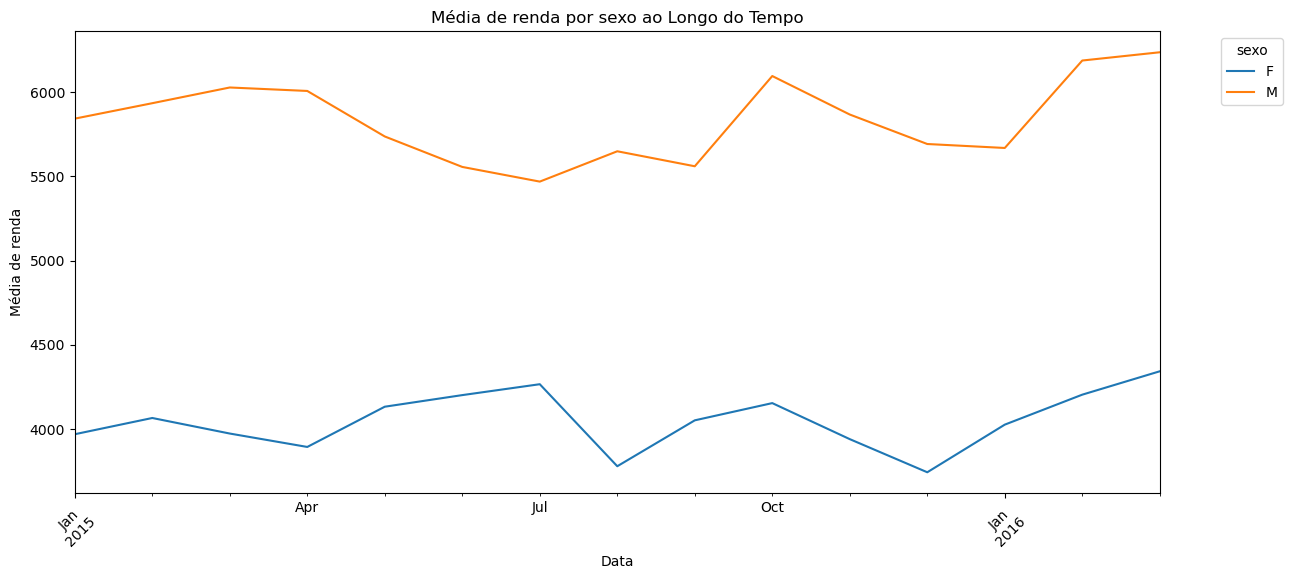

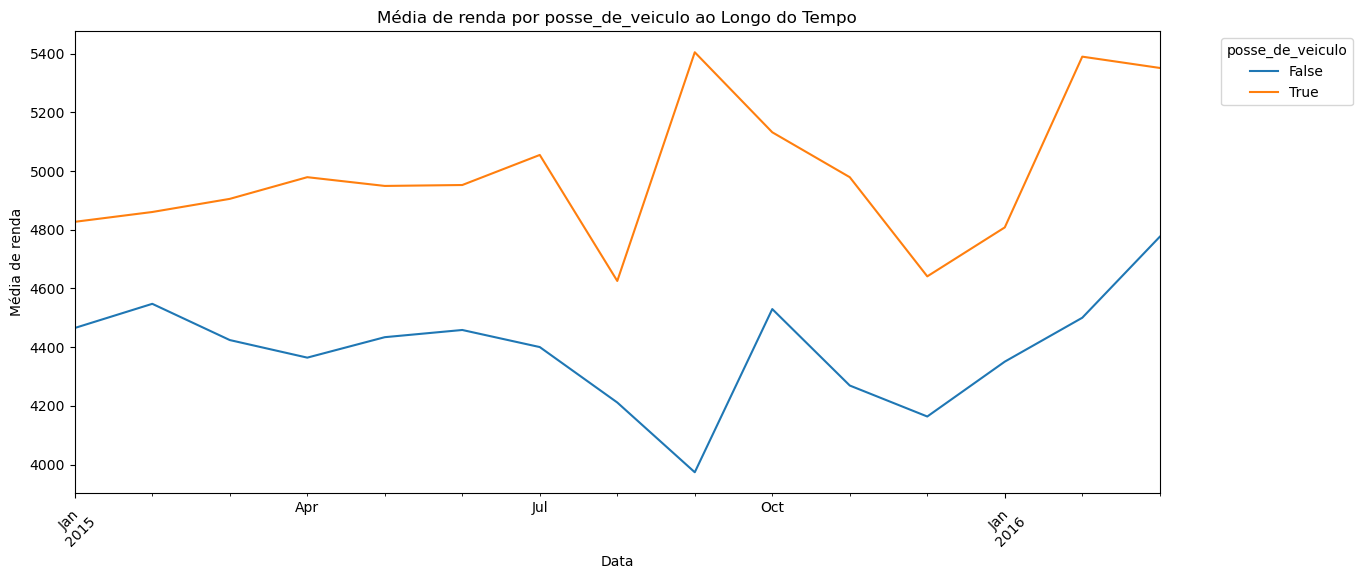

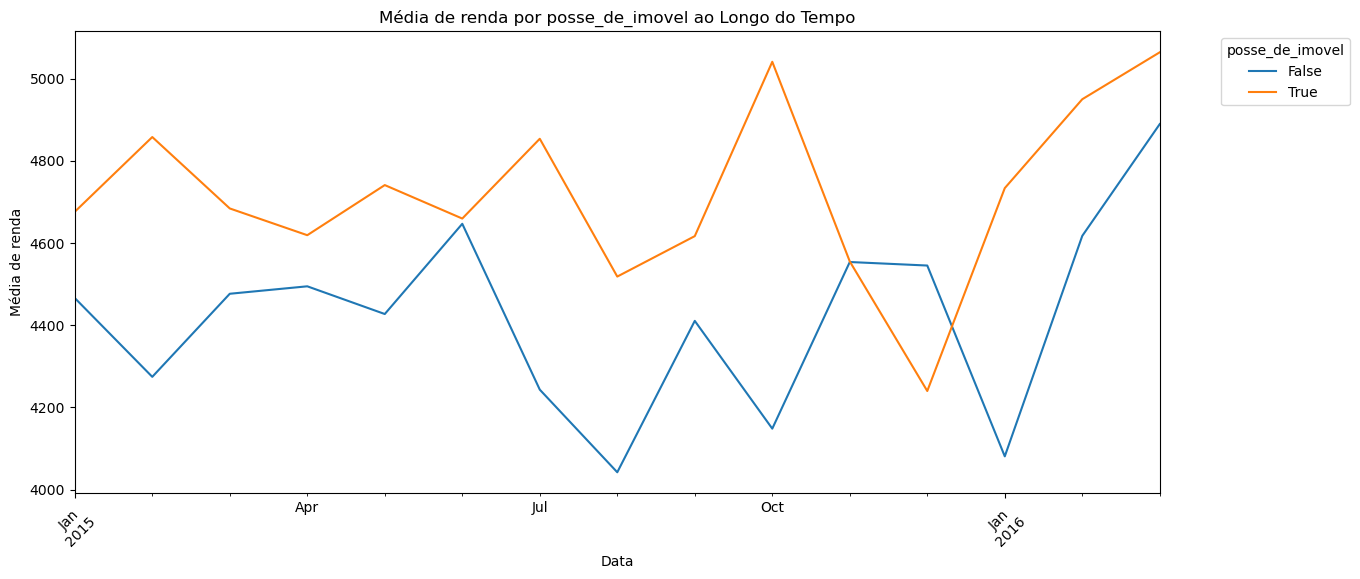

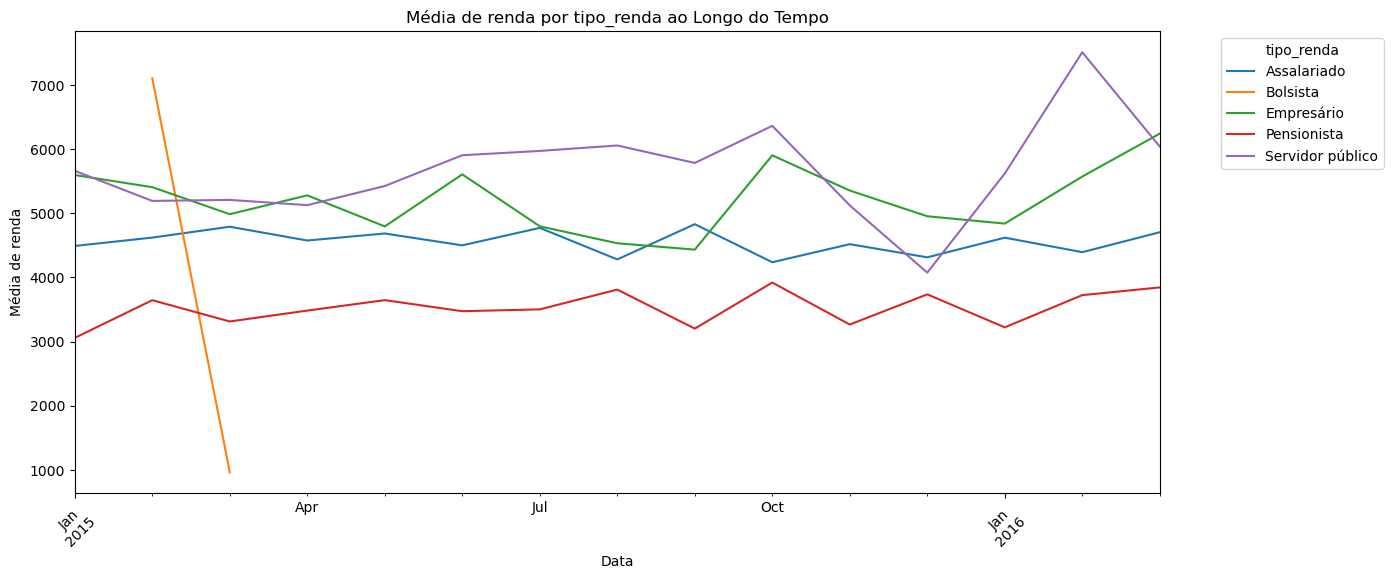

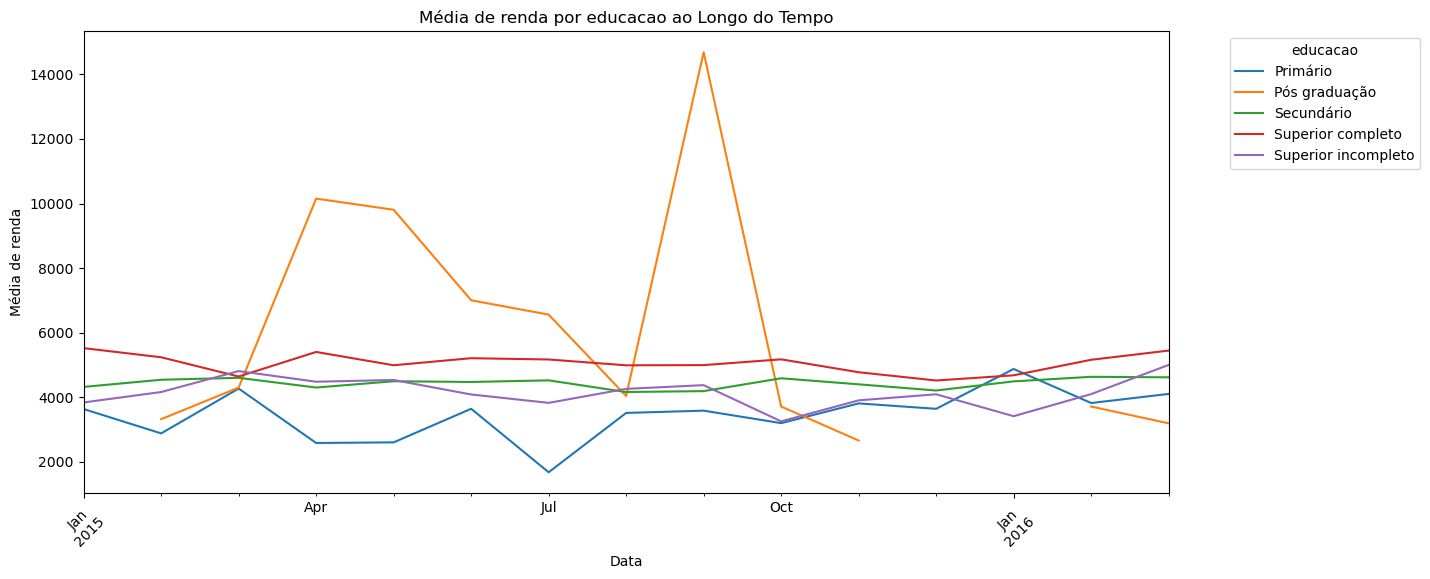

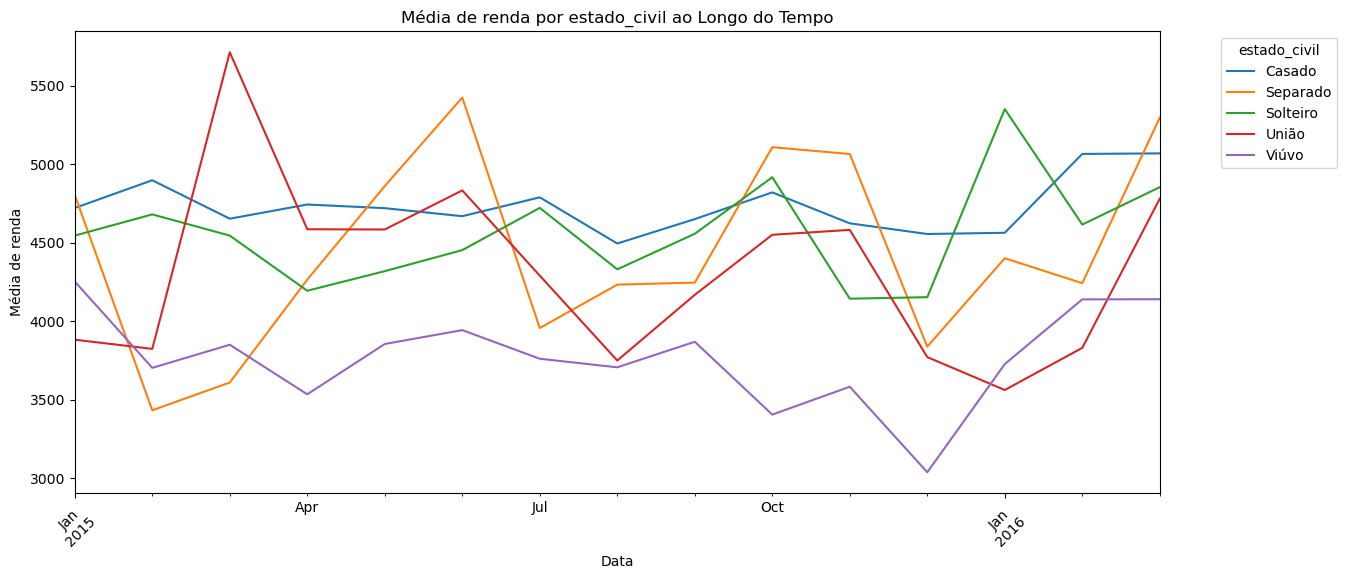

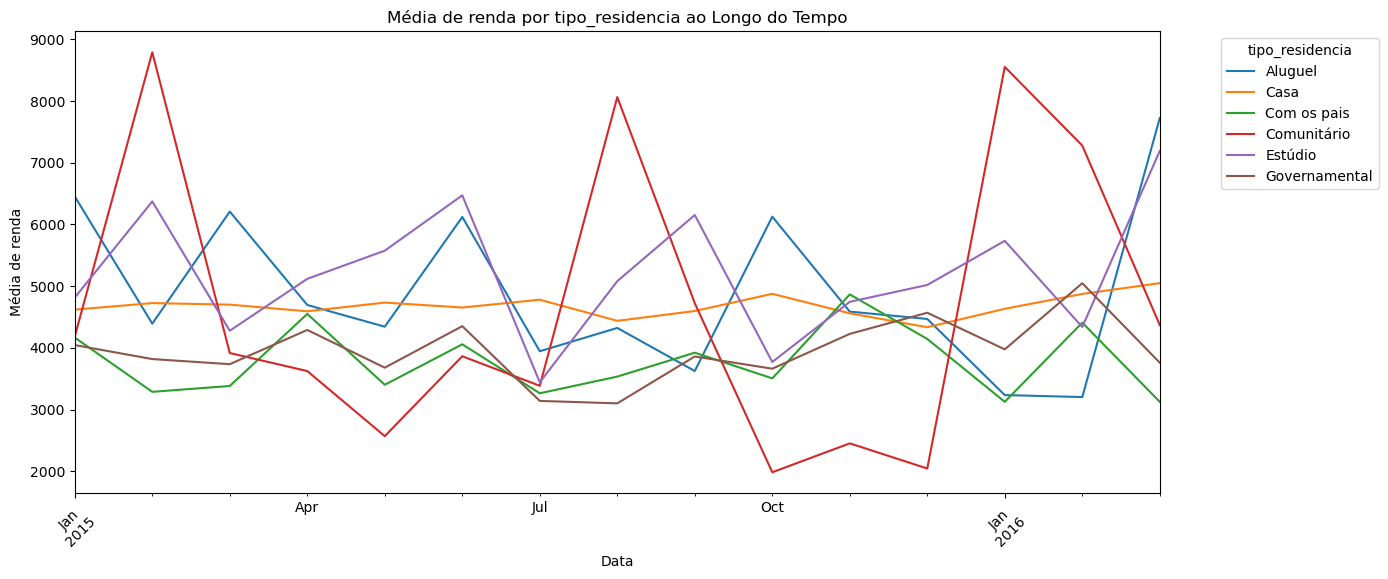

In [22]:
# Convertendo 'data_ref' para datetime e 'renda' para numérico, lidando com valores não numéricos
df ['data_ref'] = pd.to_datetime(df['data_ref'])
df ['renda'] = pd.to_numeric(df['renda'], errors='coerce')

# Removendo possíveis linhas com NaN na variável 'renda' após a conversão
dados_limpos = df.dropna(subset=['renda'])

# Definindo a função de plotagem simplificada
def plot_media_temporal_simplificado(df, variavel_qualitativa, variavel_quantitativa, titulo):
    # Agrupando os dados por data e pela variável qualitativa, e calculando a média da variável quantitativa
    dados_media = df.groupby([df['data_ref'].dt.to_period('M'), variavel_qualitativa])[variavel_quantitativa].mean().unstack()
    
    # Plotando o gráfico de linhas diretamente usando o Pandas
    ax = dados_media.plot(figsize=(14, 6), title=titulo)
    ax.set_xlabel('Data')
    ax.set_ylabel(f'Média de {variavel_quantitativa}')
    plt.xticks(rotation=45)
    plt.legend(title=variavel_qualitativa, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Lista das variáveis qualitativas
variaveis_qualitativas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Variável quantitativa de interesse
variavel_quantitativa = 'renda'

# Gerando os gráficos para cada variável qualitativa usando a função de plotagem
for variavel in variaveis_qualitativas:
    plot_media_temporal_simplificado(dados_limpos, variavel, variavel_quantitativa, f'Média de {variavel_quantitativa} por {variavel} ao Longo do Tempo')

Considerando essa alteração relevante na variável de educação, os dados podem ser muito úteis para modelagem, especialmente se a educação for um fator importante nas análises de interesse. A mudança na composição educacional pode afetar variáveis dependentes como renda, estabilidade de emprego, ou padrões de consumo, tornando a educação uma variável preditora potencialmente valiosa em modelos preditivos.